In [2]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import math
from utils import *
import glob

In [3]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
gc = np.arange(0, 32)

In [4]:
path = '/mnt/working2/felicie/data2/eTheremin/OSCYPEK/OSCYPEK/OSCYPEK_20240822_SESSION_00/'  

In [5]:
data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)

In [6]:
tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [15]:
def get_plot_coords(channel_number):
    """
    Fonction qui calcule la position en 2D d'un canal sur une Microprobe.
    Retourne la ligne et la colonne.
    """
    if channel_number in list(range(8)):
        row = 3
        col = channel_number % 8

    elif channel_number in list(range(8, 16)):
        row = 1
        col = 7 - channel_number % 8

    elif channel_number in list(range(16, 24)):
        row = 0
        col = 7 - channel_number % 8

    else:
        row = 2
        col = channel_number % 8

    return row, col

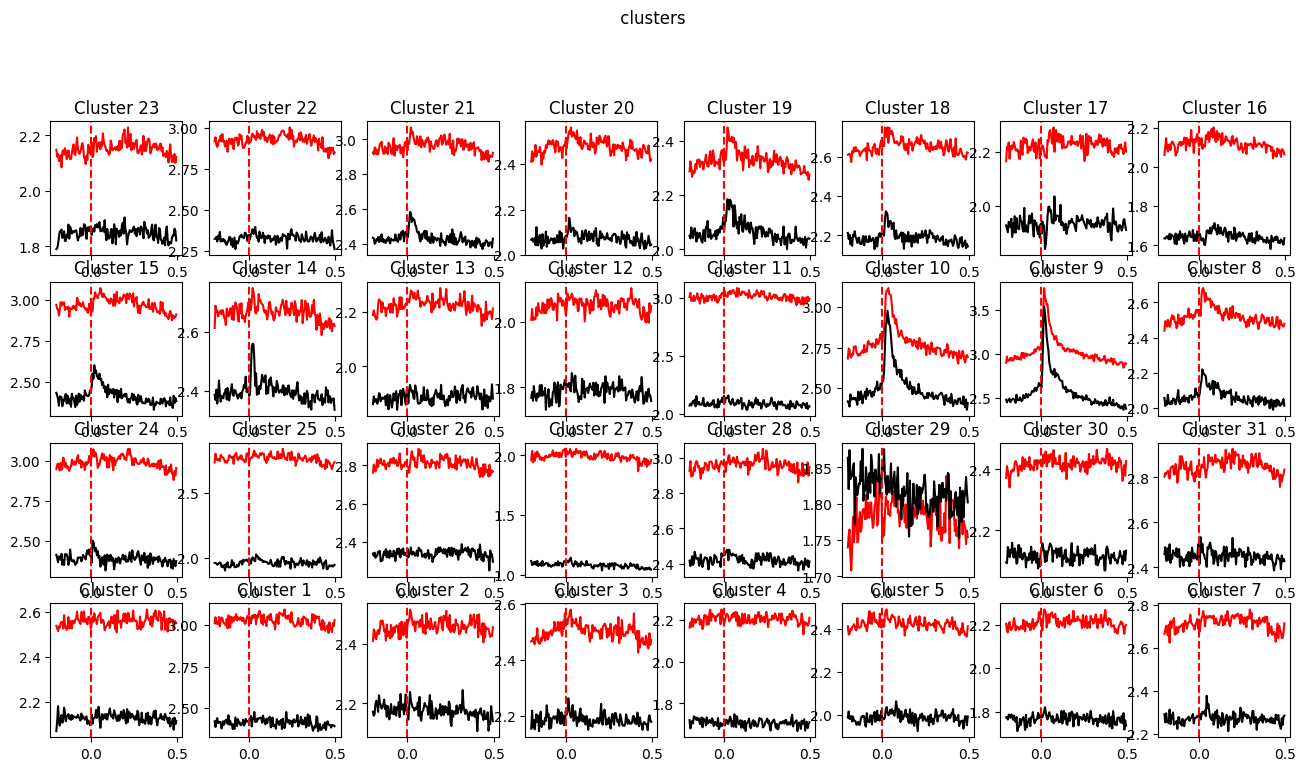

In [16]:
# pour plot cluster par cluster
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle(' clusters', y=1.02)
plt.subplots_adjust() 

for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tracking[cluster], axis=0), c = 'red')
        axes[row, col].plot(psth_bins, np.nanmean(playback[cluster], axis=0), c = 'black')
        axes[row, col].axvline(0, c = 'red', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')

In [37]:
#plot tracking vs playback moyenné sur tous les clusters
m_tracking = np.nanmean(tracking, axis=1)
tr = np.nanmean(m_tracking, axis=0)

m_playback = np.nanmean(playback, axis=1)
pb = np.nanmean(m_playback, axis=0)

plt.plot(psth_bins, tr, c = 'red')
plt.plot(psth_bins, pb, c = 'black')
plt.title('Tracking vs Playback (moyenne sur tous les clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')

Text(0, 0.5, '[spikes/s]')

In [ ]:
# Comparer les psth en début de session et fin de session 